In [1]:
#import pydytuesday
import pandas as pd
#pydytuesday.get_date('2025-05-20')

# Option 2: Read directly from GitHub 

water_quality = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/water_quality.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/weather.csv')

In [2]:
water_quality['date'] = pd.to_datetime(water_quality['date'])
weather['date'] = pd.to_datetime(weather['date'])

# Save the DataFrames to CSV files
water_quality.to_csv('water_quality.csv', index=False)
weather.to_csv('weather.csv', index=False)
water_quality.sample(10)

,region,council,swim_site,date,time,enterococci_cfu_100ml,water_temperature_c,conductivity_ms_cm,latitude,longitude
51371,Southern Sydney,Sutherland Shire Council,Elouera Beach,2010-04-28,06:41:00,0.0,NaN,NaN,-34.046610,151.159660
73886,Sydney Harbour,Northern Beaches Council,Sangrado Baths,2004-07-13,10:40:00,6.0,NaN,NaN,-33.798046,151.238332
114773,Northern Sydney,Northern Beaches Council,Shelly Beach (Manly),1994-05-17,NaN,18.0,NaN,NaN,-33.800514,151.297668
90472,Southern Sydney,Sutherland Shire Council,North Cronulla Beach,2000-04-15,06:30:00,6.0,NaN,NaN,-34.051010,151.156590
24687,Sydney City,Randwick City Council,Coogee Beach,2018-05-02,11:35:00,22.0,20.0,54200.0,-33.920760,151.258170
116386,Southern Sydney,Sutherland Shire Council,Wanda Beach,1994-02-26,NaN,27.0,NaN,NaN,-34.043930,151.162200
24321,Northern Sydney,Northern Beaches Council,Collaroy Beach,2018-06-13,08:41:00,0.0,17.0,54500.0,-33.732619,151.302884
123448,Northern Sydney,Northern Beaches Council,Whale Beach,1993-01-10,NaN,40.0,NaN,NaN,-33.611207,151.332254
120192,Northern Sydney,Northern Beaches Council,Long Reef Beach,1993-07-18,NaN,4.0,NaN,NaN,-33.745250,151.305930
83057,Sydney Harbour,Mosman Municipal Council,Little Sirius Cove,2002-03-11,10:11:00,38.0,NaN,NaN,-33.841670,151.235810


In [3]:
weather.sample(10)


,date,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
11317,2021-12-26,25.0,18.0,5.1,-33.848858,151.19551
7288,2010-12-15,25.2,18.6,0.1,-33.848858,151.19551
5260,2005-05-27,16.8,9.6,0.0,-33.848858,151.19551
2336,1997-05-25,17.8,9.4,0.0,-33.848858,151.19551
2338,1997-05-27,20.1,12.5,1.9,-33.848858,151.19551
7040,2010-04-11,26.3,14.2,0.0,-33.848858,151.19551
2054,1996-08-16,18.0,7.7,0.3,-33.848858,151.19551
10009,2018-05-28,19.5,8.3,0.0,-33.848858,151.19551
4191,2002-06-23,15.5,6.6,0.0,-33.848858,151.19551
6638,2009-03-05,23.5,15.1,0.0,-33.848858,151.19551


In [4]:
common_dates = set(weather['date']).intersection(set(water_quality['date']))
print(f'Number of common dates: {len(common_dates)}')

Number of common dates: 5175


In [5]:
# rename columns for clarity
water_quality.rename(columns={
    'swim_site': 'beach',
    'enterococci_cfu_100ml': 'enterococci',
    'water_temperature_c': 'water_temperature',
    'conductivity_ms_cm': 'conductivity'}, inplace=True)

# Which swim sites consistently have high enterococci levels?
high_enterococci_sites = water_quality[water_quality['enterococci'] > 104].groupby('beach').size().reset_index(name='count')
high_enterococci_sites = high_enterococci_sites.sort_values(by='count', ascending=False)
high_enterococci_sites.head(10)

,beach,count
4,Boat Harbour,513
18,Darling Harbour,359
37,Malabar Beach,339
19,Davidson Reserve,266
28,Greenhills Beach,258
66,Tambourine Bay,227
17,Coogee Beach,216
55,Queenscliff Beach,213
60,South Cronulla Beach,207
76,Woolwich Baths,201


In [6]:
# How does water quality vary by season or month?
water_quality['month'] = water_quality['date'].dt.month

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

water_quality['season'] = water_quality['month'].apply(month_to_season)
seasonal_quality = water_quality.groupby(['season', 'beach']).agg({'enterococci': 'mean',
                                                                      'water_temperature': 'mean',
                                                                      'conductivity': 'mean'}).reset_index()
seasonal_quality = seasonal_quality.sort_values(by='enterococci', ascending=False)
seasonal_quality.head(10)


,season,beach,enterococci,water_temperature,conductivity
66,Autumn,Tambourine Bay,3326.583120,21.188406,42973.584416
76,Autumn,Woolwich Baths,2430.580247,21.306569,44975.732026
75,Autumn,Woodford Bay,2375.720988,21.395349,45903.777778
57,Autumn,Sangrado Baths,1173.320574,20.222222,49050.000000
151,Spring,Wentworth Falls Lake - Jetty,855.682927,18.444444,1980.250000
129,Spring,Northbridge Baths,750.720812,19.765152,51134.905660
145,Spring,Tambourine Bay,729.519582,19.819549,47416.469136
18,Autumn,Darling Harbour,665.755319,20.889764,45161.006579
35,Autumn,Little Sirius Cove,583.040000,20.305556,54505.636364
19,Autumn,Davidson Reserve,573.377551,21.266667,41097.496732


In [7]:
# filter for common dates
common_dates = water_quality[water_quality['date'].isin(weather['date'])]

# Merge water quality with weather data on date but only take precipitation
common_dates = common_dates.merge(weather[['date', 'precipitation_mm']], on='date', how='inner')

# keep only relevant columns
merged_data = common_dates[['date', 'beach', 'council', 'region', 'enterococci', 'water_temperature', 'conductivity',
                            'latitude', 'longitude', 'precipitation_mm']]

# Save the merged data to a new CSV file
merged_data.to_csv('merged_water_quality_weather.csv', index=False)

# remove rows with NaN values

merged_data = merged_data.dropna().copy()

# remove outliers
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
merged_data = remove_outliers(merged_data, 'enterococci')
merged_data = remove_outliers(merged_data, 'water_temperature')
merged_data = remove_outliers(merged_data, 'conductivity')

# Save the cleaned merged data to a new CSV file
merged_data.to_csv('cleaned_merged_water_quality_weather.csv', index=False)

# Display the first few rows of the cleaned merged data
print(merged_data.head())


         date            beach                      council           region  \
13 2025-04-28  Chinamans Beach     Mosman Municipal Council   Sydney Harbour   
21 2025-04-28    Edwards Beach     Mosman Municipal Council   Sydney Harbour   
28 2025-04-28  Clifton Gardens     Mosman Municipal Council   Sydney Harbour   
30 2025-04-28     Nielsen Park  Woollahra Municipal Council   Sydney Harbour   
31 2025-04-24    Newport Beach     Northern Beaches Council  Northern Sydney   

    enterococci  water_temperature  conductivity   latitude   longitude  \
13         26.0               21.0       51500.0 -33.814094  151.248971   
21         20.0               22.0       52900.0 -33.821380  151.252830   
28         26.0               22.0       50900.0 -33.839154  151.253349   
30         24.0               22.0       53100.0 -33.849925  151.266231   
31          0.0               22.0       53700.0 -33.653976  151.323750   

    precipitation_mm  
13               1.8  
21               1.8  

C:\Users\ipekt\AppData\Local\Temp\ipykernel_11632\493584553.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


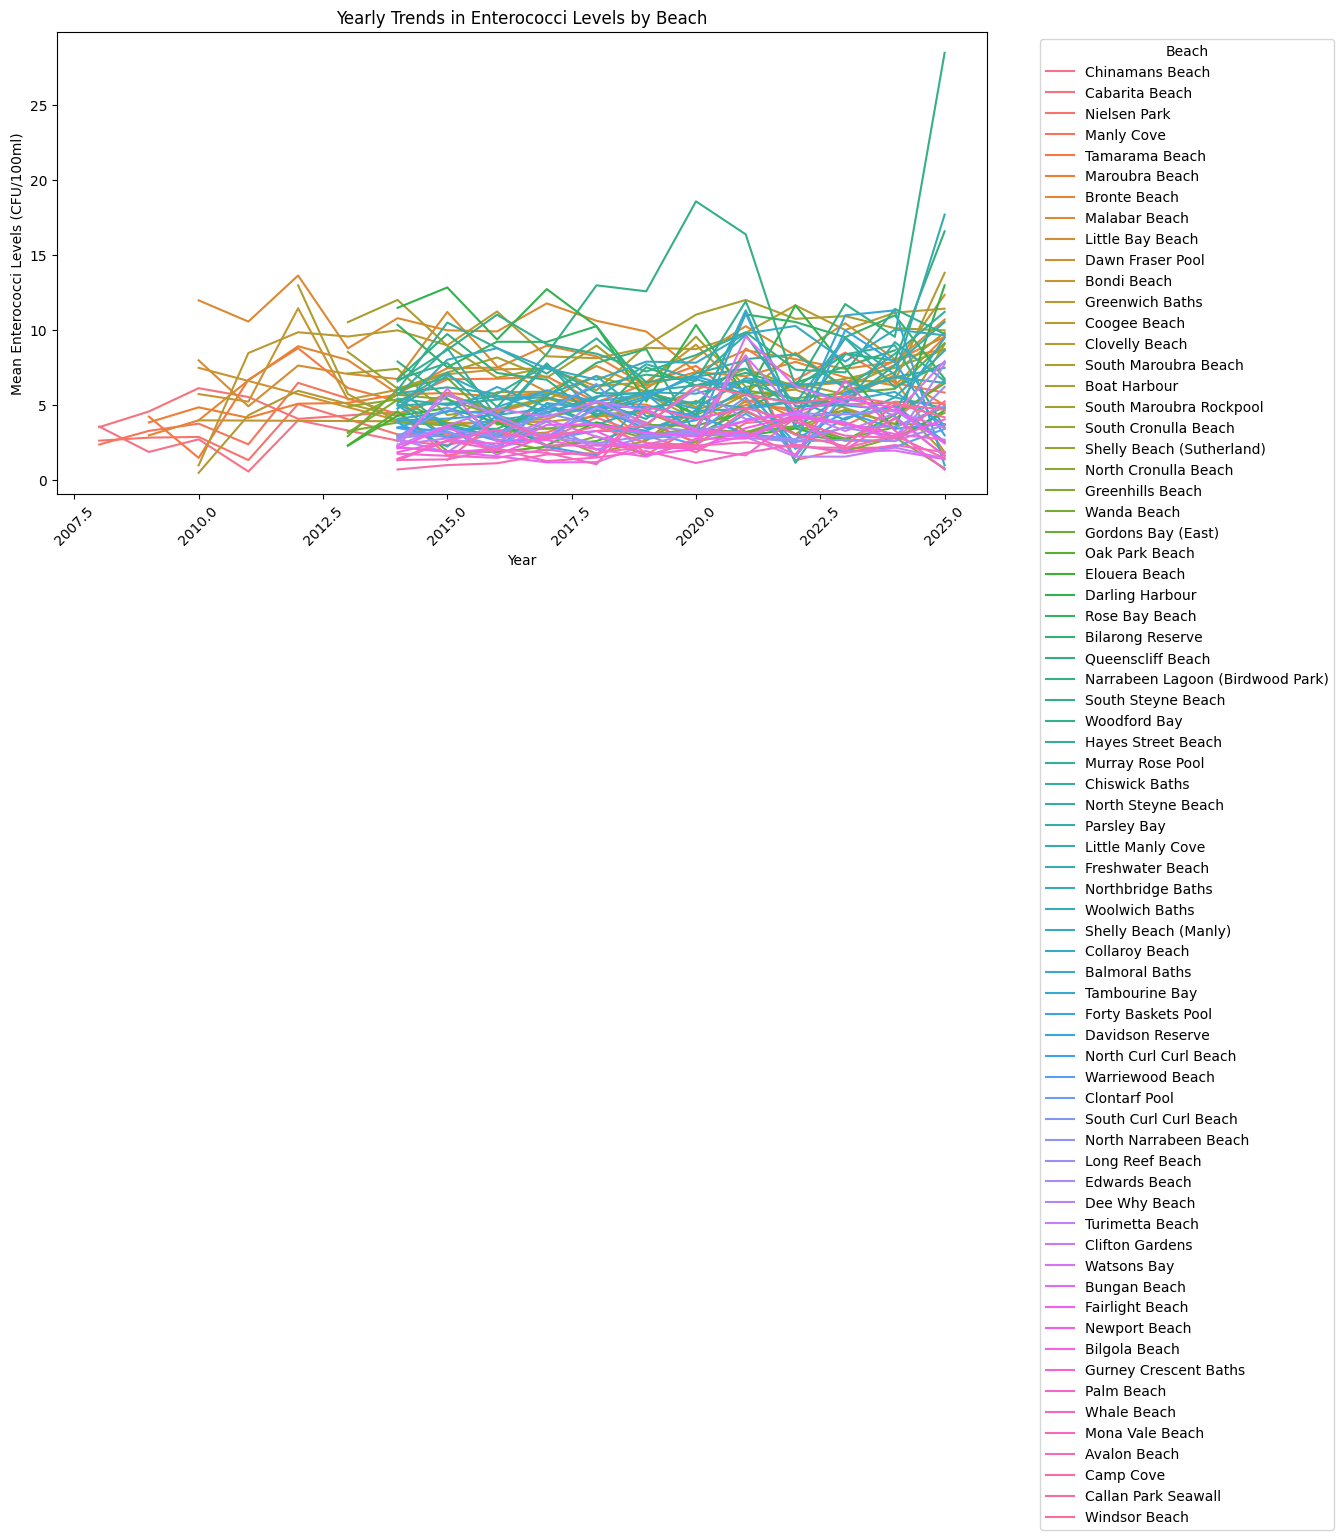

In [8]:
# Are there noticeable improvements or declines in water quality over the years?

merged_data['year'] = merged_data['date'].dt.year
yearly_trends = merged_data.groupby(['year', 'beach']).agg({
    'enterococci': 'mean',
}).reset_index()
yearly_trends = yearly_trends.sort_values(by=['year', 'enterococci'], ascending=[True, False])
yearly_trends.head(10)
yearly_trends.tail(10)

# Visualizing the trends
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='year', y='enterococci', hue='beach')
plt.title('Yearly Trends in Enterococci Levels by Beach')
plt.xlabel('Year')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=45)
plt.legend(title='Beach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\ipekt\AppData\Local\Temp\ipykernel_11632\761976129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=council_data, x='council', y='enterococci', palette='viridis')


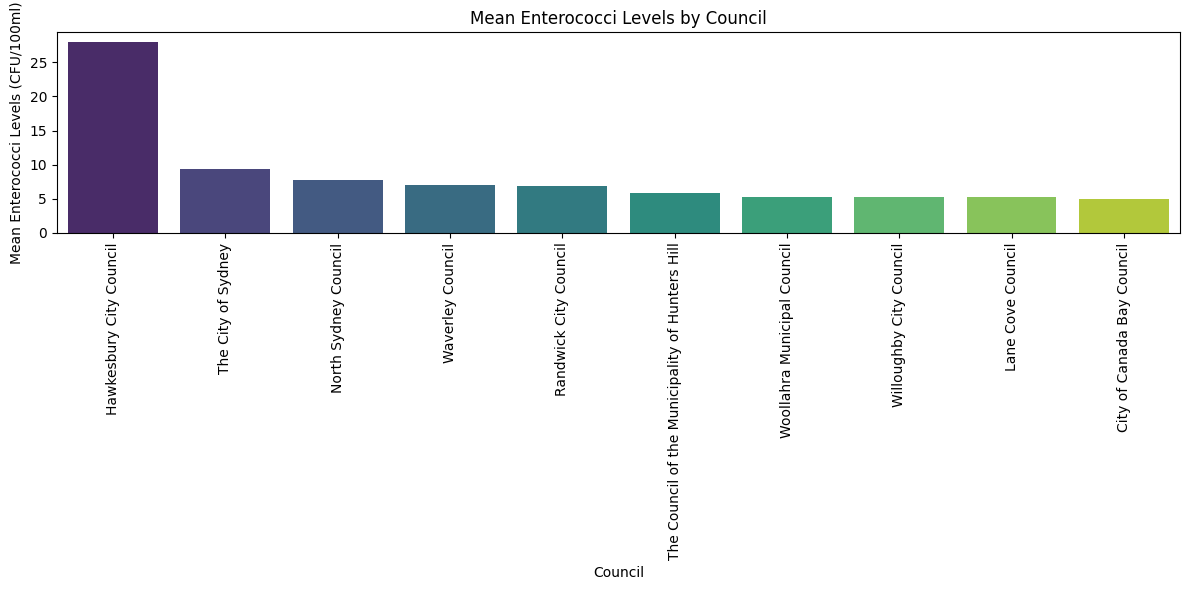

In [9]:
# What is the distribution of enterococci levels across different councils?
council_data = merged_data.groupby('council').agg({'enterococci': 'mean'}).reset_index().sort_values(by='enterococci', ascending=False).head(10)
council_data
# Visualizing the distribution of enterococci levels across councils
plt.figure(figsize=(12, 6))
sns.barplot(data=council_data, x='council', y='enterococci', palette='viridis')
plt.title('Mean Enterococci Levels by Council')
plt.xlabel('Council')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ipekt\AppData\Local\Temp\ipykernel_11632\2466049546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='region', y='enterococci', palette='viridis')


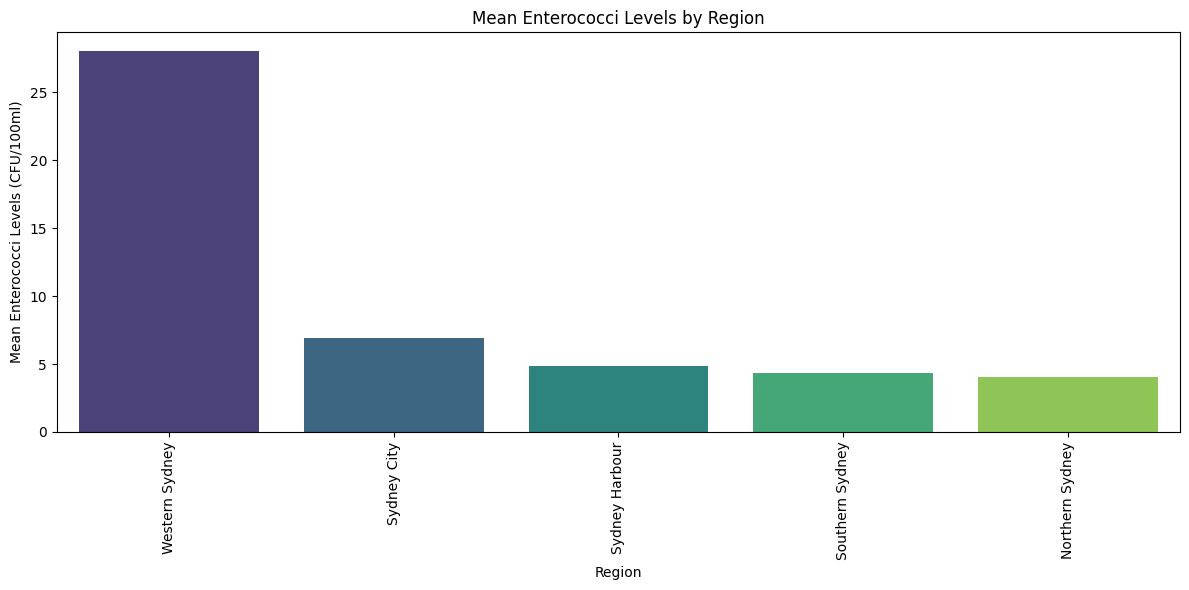

In [10]:
# What is the distribution of enterococci levels across different regions?
region_data = merged_data.groupby('region').agg({'enterococci': 'mean'}).reset_index().sort_values(by='enterococci', ascending=False).head(10)
# Visualizing the distribution of enterococci levels across regions
plt.figure(figsize=(12, 6))
sns.barplot(data=region_data, x='region', y='enterococci', palette='viridis')
plt.title('Mean Enterococci Levels by Region')
plt.xlabel('Region')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:

# Does water temperature or conductivity correlate with enterococci levels?

# Explore whether warmer or more saline water impacts bacteria levels


In [12]:
# Do certain months with high rainfall consistently have worse water quality?
merged_data['month'] = merged_data['date'].dt.month
rainfall_quality = merged_data[merged_data['precipitation_mm'] > 10].groupby('month').agg({
    'enterococci': 'mean',
    'precipitation_mm': 'sum',
    'water_temperature': 'mean',
    'conductivity': 'mean'
}).reset_index()
rainfall_quality = rainfall_quality.sort_values(by='enterococci', ascending=False)
rainfall_quality.head(10)

,month,enterococci,precipitation_mm,water_temperature,conductivity
6,7,11.212121,1284.2,17.484848,53857.575758
9,10,9.990099,2345.5,17.574257,53760.554455
11,12,9.455172,2999.9,20.317241,53558.620690
3,4,9.170000,2320.2,20.640000,53299.000000
5,6,9.048780,1487.2,16.853659,53545.121951
2,3,8.845494,5469.9,22.171674,53406.437768
4,5,8.215686,2136.1,19.421569,54057.843137
1,2,8.200000,4356.2,22.250000,53458.500000
0,1,7.842742,6026.3,22.161290,53522.580645
10,11,7.491803,3613.6,19.885246,53654.420765


In [ ]:
# Are storms followed by poor swim conditions?
# Identify storms in the weather data
# Create a new column to classify days as storm based on temperature and precipitation

storm_threshold = 20  # Example threshold for storm (high precipitation)
merged_data['event'] = merged_data.apply(
    lambda row: 'Storm' if row['precipitation_mm'] > storm_threshold else 'Normal',
    axis=1
)
# Group by event type and calculate mean enterococci levels
event_quality = merged_data.groupby('event').agg({
    'enterococci': 'mean',
    'water_temperature': 'mean',
    'conductivity': 'mean'
}).reset_index()
event_quality = event_quality.sort_values(by='enterococci', ascending=False)
event_quality.head(10)

,event,enterococci,water_temperature,conductivity
1,Storm,7.701754,20.472335,53556.511471
0,Normal,4.870186,19.452004,53815.657785


In [24]:
merged_data.head(10)
merged_data['season'] = merged_data['month'].apply(month_to_season)
merged_data.head(10)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31254 entries, 13 to 58102
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               31254 non-null  datetime64[ns]
 1   beach              31254 non-null  object        
 2   council            31254 non-null  object        
 3   region             31254 non-null  object        
 4   enterococci        31254 non-null  float64       
 5   water_temperature  31254 non-null  float64       
 6   conductivity       31254 non-null  float64       
 7   latitude           31254 non-null  float64       
 8   longitude          31254 non-null  float64       
 9   precipitation_mm   31254 non-null  float64       
 10  year               31254 non-null  int32         
 11  month              31254 non-null  int32         
 12  event              31254 non-null  object        
 13  season             31254 non-null  object        
dtypes: datetim

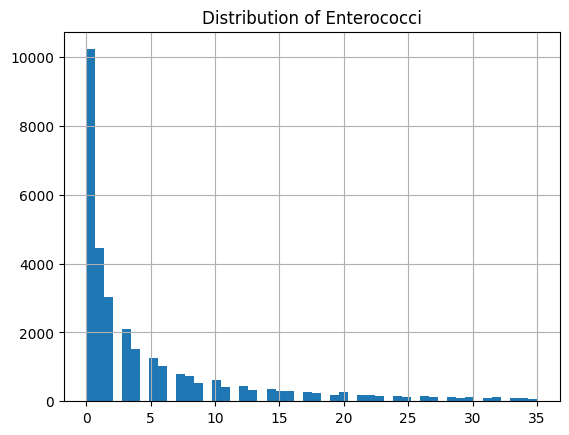

In [33]:
import matplotlib.pyplot as plt
merged_data['enterococci'].hist(bins=50)
plt.title('Distribution of Enterococci')
plt.show()


In [49]:
# Can we predict enterococci levels from weather variables?
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# Prepare the data for modeling
merged_data['season'] = merged_data['month'].apply(month_to_season)
# Convert season to categorical codes
merged_data['season_code'] = merged_data['season'].astype('category').cat.codes
merged_data['event_code'] = merged_data['event'].astype('category').cat.codes
merged_data['region_code'] = merged_data['region'].astype('category').cat.codes
merged_data['beach_code'] = merged_data['beach'].astype('category').cat.codes



X = merged_data[['precipitation_mm',  'conductivity',  'month','latitude', 'longitude']]


# Convert categorical and datetime columns to numeric
X = X.copy()
X['month'] = X['month'].astype(int)  # Ensure month is treated as numeric
X['latitude'] = X['latitude'].astype(float)
X['longitude'] = X['longitude'].astype(float)
import numpy as np
# Handle any NaN values in the features
X = X.replace([np.inf, -np.inf], np.nan).dropna()
# Define the target variable
y = merged_data['enterococci']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 45.62417149643355
R-squared: 0.15611540237603927
